In [ ]:
# źródło; http://ksgleditsch.com/data-5.html
import pandas as pd
df = pd.read_csv("http://ksgleditsch.com/data/capdist.csv")
df

,numa,ida,numb,idb,kmdist,midist
0,2,USA,20,CAN,731,456
1,2,USA,31,BHM,1623,1012
2,2,USA,40,CUB,1813,1130
3,2,USA,41,HAI,2286,1425
4,2,USA,42,DOM,2358,1471
...,...,...,...,...,...,...
41001,990,WSM,940,SOL,1581,986
41002,990,WSM,950,FJI,823,513
41003,990,WSM,983,MSI,2555,1593
41004,990,WSM,986,PAL,4786,2985


In [ ]:
df = df[["ida","idb","kmdist"]]
df[:3]

,ida,idb,kmdist
0,USA,CAN,731
1,USA,BHM,1623
2,USA,CUB,1813


In [ ]:
df.ida.nunique(), df.idb.nunique()

(203, 203)

In [ ]:
import numpy as np
matrix=np.zeros((df.ida.nunique(),df.idb.nunique()))
matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
matrix_cities = pd.DataFrame(matrix, index=df.ida.sort_values().unique(), columns=df.idb.sort_values().unique())
matrix_cities

,AAB,AFG,ALB,ALG,AND,ANG,ARG,ARM,AUH,AUL,AUS,AZE,BAH,BAR,BEL,BEN,BFO,BHM,BHU,BLR,BLZ,BNG,BOL,BOS,BOT,BRA,BRU,BUI,BUL,CAM,CAN,CAO,CAP,CDI,CEN,CHA,CHL,CHN,COL,COM,...,SOM,SPN,SRI,STP,SUD,SUR,SVG,SWA,SWD,SWZ,SYR,TAJ,TAW,TAZ,TBT,THI,TKM,TOG,TRA,TRI,TUN,TUR,UAE,UGA,UK,UKR,URU,USA,UZB,VAN,VEN,VNM,WSM,YAR,YEM,YPR,YUG,ZAM,ZAN,ZIM
AAB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AFG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ALB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ALG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AND,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YPR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YUG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZAM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZAN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df[:3]

,ida,idb,kmdist
0,USA,CAN,731
1,USA,BHM,1623
2,USA,CUB,1813


In [ ]:
matrix_cities[:3]

,AAB,AFG,ALB,ALG,AND,ANG,ARG,ARM,AUH,AUL,AUS,AZE,BAH,BAR,BEL,BEN,BFO,BHM,BHU,BLR,BLZ,BNG,BOL,BOS,BOT,BRA,BRU,BUI,BUL,CAM,CAN,CAO,CAP,CDI,CEN,CHA,CHL,CHN,COL,COM,...,SOM,SPN,SRI,STP,SUD,SUR,SVG,SWA,SWD,SWZ,SYR,TAJ,TAW,TAZ,TBT,THI,TKM,TOG,TRA,TRI,TUN,TUR,UAE,UGA,UK,UKR,URU,USA,UZB,VAN,VEN,VNM,WSM,YAR,YEM,YPR,YUG,ZAM,ZAN,ZIM
AAB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AFG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ALB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
matrix_cities.columns[0]

'AAB'

In [ ]:
matrix_cities.index[1]

'AFG'

In [ ]:
f_ida = df.ida == matrix_cities.columns[0]
f_idb = df.idb == matrix_cities.index[1]
df[f_ida & f_idb]

,ida,idb,kmdist
2784,AAB,AFG,12312


In [ ]:
df[f_ida & f_idb].values[0][2]

12312

In [ ]:
for ida_val in matrix_cities.columns[:]:
  for idb_val in matrix_cities.index[:]:
    
    f_ida = df.ida == ida_val
    f_idb = df.idb == idb_val
    try:
      distance = df[f_ida & f_idb].kmdist.values[0]
    except:
      distance = 0
    # print(ida_val, "-------------------->", idb_val)
    print(ida_val, "-->", idb_val, "-", distance, " km")

    # print(matrix_cities.loc[ida_val][idb_val])

    matrix_cities.loc[ida_val][idb_val] = distance

    # print(matrix_cities.loc[ida_val][idb_val])


Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
THI --> GUI - 12334  km
THI --> GUY - 16738  km
THI --> HAI - 16388  km
THI --> HON - 16854  km
THI --> HUN - 8289  km
THI --> ICE - 10152  km
THI --> IND - 2920  km
THI --> INS - 2236  km
THI --> IRE - 9930  km
THI --> IRN - 5471  km
THI --> IRQ - 6077  km
THI --> ISR - 6956  km
THI --> ITA - 8871  km
THI --> JAM - 16536  km
THI --> JOR - 6843  km
THI --> JPN - 4633  km
THI --> KEN - 7186  km
THI --> KOR - 3744  km
THI --> KUW - 5675  km
THI --> KYR - 4072  km
THI --> KZK - 4009  km
THI --> LAO - 503  km
THI --> LAT - 7953  km
THI --> LBR - 12133  km
THI --> LEB - 6897  km
THI --> LES - 9142  km
THI --> LIB - 8955  km
THI --> LIE - 9011  km
THI --> LIT - 7852  km
THI --> LUX - 9202  km
THI --> MAA - 12232  km
THI --> MAC - 8131  km
THI --> MAD - 3212  km
THI --> MAG - 6747  km
THI --> MAL - 1126  km
THI --> MAS - 5955  km
THI --> MAW - 7914  km
THI --> MEX - 15791  km
THI --> MLD - 7557  km
THI --> MLI - 11642  km
THI --

In [ ]:
matrix_cities

,AAB,AFG,ALB,ALG,AND,ANG,ARG,ARM,AUH,AUL,AUS,AZE,BAH,BAR,BEL,BEN,BFO,BHM,BHU,BLR,BLZ,BNG,BOL,BOS,BOT,BRA,BRU,BUI,BUL,CAM,CAN,CAO,CAP,CDI,CEN,CHA,CHL,CHN,COL,COM,...,SOM,SPN,SRI,STP,SUD,SUR,SVG,SWA,SWD,SWZ,SYR,TAJ,TAW,TAZ,TBT,THI,TKM,TOG,TRA,TRI,TUN,TUR,UAE,UGA,UK,UKR,URU,USA,UZB,VAN,VEN,VNM,WSM,YAR,YEM,YPR,YUG,ZAM,ZAN,ZIM
AAB,0.0,12312.0,8078.0,6655.0,6558.0,8691.0,5687.0,10109.0,7728.0,16346.0,7728.0,10518.0,11341.0,495.0,6864.0,7096.0,6487.0,1678.0,14216.0,8460.0,2798.0,14623.0,3740.0,7941.0,10549.0,3893.0,17577.0,10220.0,8349.0,16550.0,3397.0,8127.0,4022.0,6246.0,8858.0,8230.0,5646.0,13760.0,1925.0,11949.0,...,11750.0,6101.0,15066.0,7719.0,9974.0,1439.0,427.0,11109.0,7802.0,7048.0,9705.0,12005.0,15315.0,11379.0,14056.0,16131.0,11322.0,6937.0,10807.0,711.0,7298.0,9203.0,11725.0,10457.0,6590.0,8718.0,5713.0,2834.0,11821.0,14816.0,959.0,16663.0,14205.0,11140.0,11140.0,11341.0,8088.0,10521.0,11367.0,10836.0
AFG,12312.0,0.0,4355.0,5901.0,5820.0,7520.0,15240.0,2277.0,4591.0,11308.0,4591.0,1834.0,1930.0,12461.0,5448.0,7468.0,7485.0,12551.0,2106.0,3874.0,13791.0,2406.0,15293.0,4444.0,7904.0,13385.0,5721.0,5859.0,4057.0,4426.0,10496.0,6868.0,9297.0,8198.0,6178.0,5976.0,16305.0,4199.0,14232.0,5709.0,...,4335.0,6312.0,3296.0,7405.0,4218.0,12678.0,12579.0,7788.0,4625.0,5286.0,3029.0,444.0,5120.0,5452.0,2125.0,3924.0,1035.0,7606.0,7857.0,12796.0,5286.0,3268.0,1806.0,5371.0,5725.0,3596.0,15034.0,11184.0,774.0,11695.0,13266.0,4600.0,12041.0,3278.0,3278.0,3456.0,4277.0,6946.0,5468.0,6972.0
ALB,8078.0,4355.0,0.0,1561.0,1524.0,5506.0,11554.0,2079.0,819.0,15581.0,819.0,2523.0,3335.0,8160.0,1561.0,4249.0,3839.0,8719.0,6443.0,1457.0,10159.0,6761.0,10988.0,248.0,7266.0,9315.0,10076.0,4996.0,311.0,8780.0,7265.0,4304.0,5030.0,4621.0,4119.0,3264.0,12373.0,7737.0,9995.0,6276.0,...,5037.0,1981.0,7068.0,4637.0,3146.0,8322.0,8294.0,7549.0,1999.0,1148.0,1710.0,4156.0,9122.0,5605.0,6405.0,8275.0,3323.0,4315.0,7403.0,8488.0,1005.0,1126.0,3723.0,4737.0,1868.0,1294.0,11396.0,7777.0,4090.0,15800.0,9006.0,8956.0,15950.0,3724.0,3724.0,4048.0,338.0,6302.0,5609.0,6566.0
ALG,6655.0,5901.0,1561.0,0.0,725.0,5022.0,10065.0,3625.0,1718.0,16957.0,1718.0,4074.0,4685.0,6689.0,1559.0,3338.0,2710.0,7502.0,7996.0,2691.0,8970.0,8305.0,9427.0,1535.0,7105.0,7783.0,11618.0,5134.0,1870.0,10317.0,6441.0,3769.0,3477.0,3440.0,3906.0,2932.0,10836.0,9216.0,8544.0,6729.0,...,5761.0,731.0,8421.0,3920.0,3755.0,6787.0,6833.0,7508.0,2773.0,1170.0,3054.0,5715.0,10655.0,6023.0,7965.0,9807.0,4866.0,3346.0,7297.0,7008.0,643.0,2636.0,5070.0,5031.0,1678.0,2694.0,9918.0,6824.0,5651.0,17267.0,7554.0,10497.0,17285.0,4694.0,4694.0,4969.0,1728.0,6284.0,6022.0,6601.0
AND,6558.0,5820.0,1524.0,725.0,0.0,5744.0,10464.0,3564.0,1309.0,17101.0,1309.0,3991.0,4848.0,6656.0,870.0,4052.0,3398.0,7221.0,7872.0,2261.0,8673.0,8216.0,9610.0,1385.0,7811.0,8130.0,11519.0,5781.0,1791.0,10238.0,5939.0,4491.0,3814.0,4102.0,4600.0,3630.0,11148.0,8811.0,8479.0,7315.0,...,6253.0,510.0,8589.0,4644.0,4257.0,6875.0,6785.0,8200.0,2159.0,612.0,3208.0,5578.0,10321.0,6613.0,7803.0,9743.0,4798.0,4054.0,7996.0,6988.0,1029.0,2647.0,5237.0,5642.0,955.0,2362.0,10333.0,6383.0,5468.0,16750.0,7492.0,10406.0,16671.0,5075.0,5075.0,5375.0,1543.0,6967.0,6613.0,7277.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YPR,11341.0,3456.0,4048.0,4969.0,5375.0,4170.0,11984.0,3104.0,4795.0,12049.0,4795.0,3144.0,1686.0,11226.0,5608.0,4689.0,5047.0,12436.0,4933.0,4809.0,13904.0,4951.0,12797.0,4283.0,4514.0,10629.0,7690.0,2412.0,3937.0,6501.0,11295.0,3818.0,7419.0,5556.0,3029.0,3259.0,13111.0,7554.0,13030.0,2579.0,...,1119.0,5670.0,3876.0,4365.0,1372.0,10965.0,11398.0,4492.0,5680.0,5174.0,2491.0,3728.0,8109.0,2114.0,5130.0,6008.0,3081.0,4852.0,4506.0,11489.0,4387.0,3233.0,1663

In [ ]:
matrix_cities.to_excel("cites_distance_matrix.xlsx")

Otworzenie pliku

In [ ]:
matrix_cities = pd.read_excel("cites_distance_matrix.xlsx").rename(columns={"Unnamed: 0":"index"}).set_index("index")
matrix_cities[:3]

,AAB,AFG,ALB,ALG,AND,ANG,ARG,ARM,AUH,AUL,AUS,AZE,BAH,BAR,BEL,BEN,BFO,BHM,BHU,BLR,BLZ,BNG,BOL,BOS,BOT,BRA,BRU,BUI,BUL,CAM,CAN,CAO,CAP,CDI,CEN,CHA,CHL,CHN,COL,COM,...,SOM,SPN,SRI,STP,SUD,SUR,SVG,SWA,SWD,SWZ,SYR,TAJ,TAW,TAZ,TBT,THI,TKM,TOG,TRA,TRI,TUN,TUR,UAE,UGA,UK,UKR,URU,USA,UZB,VAN,VEN,VNM,WSM,YAR,YEM,YPR,YUG,ZAM,ZAN,ZIM
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AAB,0,12312,8078,6655,6558,8691,5687,10109,7728,16346,7728,10518,11341,495,6864,7096,6487,1678,14216,8460,2798,14623,3740,7941,10549,3893,17577,10220,8349,16550,3397,8127,4022,6246,8858,8230,5646,13760,1925,11949,...,11750,6101,15066,7719,9974,1439,427,11109,7802,7048,9705,12005,15315,11379,14056,16131,11322,6937,10807,711,7298,9203,11725,10457,6590,8718,5713,2834,11821,14816,959,16663,14205,11140,11140,11341,8088,10521,11367,10836
AFG,12312,0,4355,5901,5820,7520,15240,2277,4591,11308,4591,1834,1930,12461,5448,7468,7485,12551,2106,3874,13791,2406,15293,4444,7904,13385,5721,5859,4057,4426,10496,6868,9297,8198,6178,5976,16305,4199,14232,5709,...,4335,6312,3296,7405,4218,12678,12579,7788,4625,5286,3029,444,5120,5452,2125,3924,1035,7606,7857,12796,5286,3268,1806,5371,5725,3596,15034,11184,774,11695,13266,4600,12041,3278,3278,3456,4277,6946,5468,6972
ALB,8078,4355,0,1561,1524,5506,11554,2079,819,15581,819,2523,3335,8160,1561,4249,3839,8719,6443,1457,10159,6761,10988,248,7266,9315,10076,4996,311,8780,7265,4304,5030,4621,4119,3264,12373,7737,9995,6276,...,5037,1981,7068,4637,3146,8322,8294,7549,1999,1148,1710,4156,9122,5605,6405,8275,3323,4315,7403,8488,1005,1126,3723,4737,1868,1294,11396,7777,4090,15800,9006,8956,15950,3724,3724,4048,338,6302,5609,6566


kodowanie

In [ ]:
decoder_city_id =  {k:v for k,v in zip(matrix_cities.columns,range(1,len(matrix_cities.columns)+1))}
decoder_city_id["POL"]

141

In [ ]:
encoder_id_city =  {v:k for k,v in zip(matrix_cities.columns,range(1,len(matrix_cities.columns)+1))}
encoder_id_city[141]

'POL'

In [ ]:
matrix_cities_code = matrix_cities.rename(columns=decoder_city_id, index=decoder_city_id).reset_index().rename(columns={"index":"id"})
matrix_cities_code

,id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203
0,1,0,12312,8078,6655,6558,8691,5687,10109,7728,16346,7728,10518,11341,495,6864,7096,6487,1678,14216,8460,2798,14623,3740,7941,10549,3893,17577,10220,8349,16550,3397,8127,4022,6246,8858,8230,5646,13760,1925,...,11750,6101,15066,7719,9974,1439,427,11109,7802,7048,9705,12005,15315,11379,14056,16131,11322,6937,10807,711,7298,9203,11725,10457,6590,8718,5713,2834,11821,14816,959,16663,14205,11140,11140,11341,8088,10521,11367,10836
1,2,12312,0,4355,5901,5820,7520,15240,2277,4591,11308,4591,1834,1930,12461,5448,7468,7485,12551,2106,3874,13791,2406,15293,4444,7904,13385,5721,5859,4057,4426,10496,6868,9297,8198,6178,5976,16305,4199,14232,...,4335,6312,3296,7405,4218,12678,12579,7788,4625,5286,3029,444,5120,5452,2125,3924,1035,7606,7857,12796,5286,3268,1806,5371,5725,3596,15034,11184,774,11695,13266,4600,12041,3278,3278,3456,4277,6946,5468,6972
2,3,8078,4355,0,1561,1524,5506,11554,2079,819,15581,819,2523,3335,8160,1561,4249,3839,8719,6443,1457,10159,6761,10988,248,7266,9315,10076,4996,311,8780,7265,4304,5030,4621,4119,3264,12373,7737,9995,...,5037,1981,7068,4637,3146,8322,8294,7549,1999,1148,1710,4156,9122,5605,6405,8275,3323,4315,7403,8488,1005,1126,3723,4737,1868,1294,11396,7777,4090,15800,9006,8956,15950,3724,3724,4048,338,6302,5609,6566
3,4,6655,5901,1561,0,725,5022,10065,3625,1718,16957,1718,4074,4685,6689,1559,3338,2710,7502,7996,2691,8970,8305,9427,1535,7105,7783,11618,5134,1870,10317,6441,3769,3477,3440,3906,2932,10836,9216,8544,...,5761,731,8421,3920,3755,6787,6833,7508,2773,1170,3054,5715,10655,6023,7965,9807,4866,3346,7297,7008,643,2636,5070,5031,1678,2694,9918,6824,5651,17267,7554,10497,17285,4694,4694,4969,1728,6284,6022,6601
4,5,6558,5820,1524,725,0,5744,10464,3564,1309,17101,1309,3991,4848,6656,870,4052,3398,7221,7872,2261,8673,8216,9610,1385,7811,8130,11519,5781,1791,10238,5939,4491,3814,4102,4600,3630,11148,8811,8479,...,6253,510,8589,4644,4257,6875,6785,8200,2159,612,3208,5578,10321,6613,7803,9743,4798,4054,7996,6988,1029,2647,5237,5642,955,2362,10333,6383,5468,16750,7492,10406,16671,5075,5075,5375,1543,6967,6613,7277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,199,11341,3456,4048,4969,5375,4170,11984,3104,4795,12049,4795,3144,1686,11226,5608,4689,5047,12436,4933,4809,13904,4951,12797,4283,4514,10629,7690,2412,3937,6501,11295,3818,7419,5556,3029,3259,13111,7554,13030,...,1119,5670,3876,4365,1372,10965,11398,4492,5680,5174,2491,3728,8109,2114,5130,6008,3081,4852,4506,11489,4387,3233,1663,1922,5914,4422,11769,11758,3995,13754,12103,6706,14305,340,340,0,4256,3518,2127,3587
199,200,8088,4277,338,1728,1543,5844,11780,2024,542,15566,542,2448,3415,8197,1389,4570,4135,8644,6340,1129,10067,6676,11117,196,7592,9511,9985,5309,321,8699,7097,4641,5203,4914,4454,3602,12564,7505,10012,...,5275,2035,7113,4970,3425,8409,8324,7867,1670,1056,1837,4045,8927,5886,6283,8201,3255,4630,7726,8530,1247,1163,3799,5037,1702,1005,11628,7635,3953,15573,9028,8869,15687,3926,3926,4256,0,6622,5890,6880
200,201,10521,6946,6302,6284,6967,1842,8805,6338,7112,11635,7112,6507,5188,10176,7615,3690,4470,12126,8080,7572,13277,7956,10217,6541,1035,8128,9718,1338,6369,8884,12286,2752,6718,4407,2383,3356,9924,10863,11497,...,2648,6969,6118,2963,3376,9499,10353,1251,8288,7120,5409,7242,11009,1543,8340,8508,6581,3816,1113,10293,6003,6034,5178,1732,7845,7237,8593,12375,7513,14286,10876,9066,14907,3758,3758,3518,6622,0,1526,347
201,202,11367,5468,5609,6022,6613,2878,10321,5161,6423,11390,6423,5250,3810,11098,7093

In [ ]:
df_encoder_id_city = pd.DataFrame.from_dict(encoder_id_city,orient='index').reset_index().rename(columns={"index":"id",0:"ISO Code (3 letters)"})
df_encoder_id_city[:3]

,id,ISO Code (3 letters)
0,1,AAB
1,2,AFG
2,3,ALB


In [ ]:
#źródło: https://www.sport-histoire.fr/en/Geography/ISO_codes_countries.php
cci = """
Country	Capital	ISO Code (3 letters)	ISO Code (2 letters)
Afghanistan	Kabul	AFG	AF
Albania	Tirana	ALB	AL
Algeria	Algiers	DZA	DZ
Andorra	Andorra la Vella	AND	AD
Angola	Luanda	AGO	AO
Antigua and Barbuda	St. John's	ATG	AG
Argentina	Buenos Aires	ARG	AR
Armenia	Yerevan	ARM	AM
Australia	Canberra	AUS	AU
Austria	Vienna	AUT	AT
Azerbaijan	Baku	AZE	AZ
Bahamas	Nassau	BHS	BS
Bahrain	Manama	BHR	BH
Bangladesh	Dhaka	BGD	BD
Barbados	Bridgetown	BRB	BB
Belarus	Minsk	BLR	BY
Belgium	Brussels	BEL	BE
Belize	Belmopan	BLZ	BZ

 
Benin	Porto Novo	BEN	BJ
Bhutan	Thimphu	BTN	BT
Bolivia	Sucre	BOL	BO
Bosnia and Herzegovina	Sarajevo	BIH	BA
Botswana	Gaborone	BWA	BW
Brazil	Brasilia	BRA	BR
Brunei	Bandar Seri Begawan	BRN	BN
Bulgaria	Sofia	BGR	BG
Burkina Faso	Ouagadougou	BFA	BF
Burundi	Bujumbura	BDI	BI
Cambodia	Phnom Penh	KHM	KH
Cameroon	Yaoundé	CMR	CM
Canada	Ottawa	CAN	CA
Cape Verde	Praia	CPV	CV
Central African Republic	Bangui	CAF	CF
Chad	N'Djamena	TCD	TD
Chile	Santiago	CHL	CL
China	Beijing	CHN	CN
Colombia	Bogota	COL	CO
Comoros	Moroni	COM	KM
Costa Rica	San José	CRI	CR
Croatia	Zagreb	HRV	HR
Cuba	Havana	CUB	CU
Cyprus	Nicosia	CYP	CY
Czech Republic	Prague	CZE	CZ
Democratic Republic of Congo	Kinshasa	COD	CD
Denmark	Copenagen	DNK	DK
Djibouti	Djibouti	DJI	DJ
Dominica	Roseau	DMA	DM
Dominican Republic	Santo Domingo	DOM	DO
East Timor	Dili	TLS	TL
Ecuador	Quito	ECU	EC

 
Egypt	Cairo	EGY	EG
El Salvador	San Salvador	SLV	SV
Equatorial Guinea	Malabo	GNQ	GQ
Eritrea	Asmara	ERI	ER
Estonia	Tallinn	EST	EE
Eswatini	Mbabane	SWZ	SZ
Ethiopia	Addis Ababa	ETH	ET
Fiji	Suva	FJI	FJ
Finland	Helsinki	FIN	FI
France	Paris	FRA	FR
Gabon	Libreville	GAB	GA
Gambia	Banjul	GMB	GM
Georgia	Tbilisi	GEO	GE
Germany	Berlin	DEU	DE
Ghana	Accra	GHA	GH
Greece	Athens	GRC	GR
Grenada	St. George's	GRD	GD
Guatemala	Guatemala City	GTM	GT
Guinea	Conakry	GIN	GN
Guinea-Bissau	Bissau	GNB	GW
Guyana	Georgetown	GUY	GY
Haiti	Port-au-Prince	HTI	HT
Honduras	Tegucigalpa	HND	HN
Hungary	Budapest	HUN	HU
Iceland	Reykjavík	ISL	IS
India	New Delhi	IND	IN
Indonesia	Jakarta	IDN	ID
Iran	Tehran	IRN	IR
Iraq	Baghdad	IRQ	IQ
Ireland	Dublin	IRL	IE
Israel	Jerusalem	ISR	IL
Italy	Rome	ITA	IT
Ivory Coast	Yamoussoukro	CIV	CI
Jamaica	Kingston	JAM	JM
Japan	Tokyo	JPN	JP
Jordan	Amman	JOR	JO
Kazakhstan	Astana	KAZ	KZ
Kenya	Nairobi	KEN	KE
Kiribati	Tarawa	KIR	KI
Korea, North	Pyongyang	PRK	KP
Korea, South	Seoul	KOR	KR
Kosovo	Pristina	-	-
Kuwait	Kuwait City	KWT	KW
Kyrgyzstan	Bishkek	KGZ	KG
Laos	Vientiane	LAO	LA
Latvia	Riga	LVA	LV
Lebanon	Beirut	LBN	LB
Lesotho	Maseru	LSO	LS
Liberia	Monrovia	LBR	LR
Libya	Tripoli	LBY	LY

 
Liechtenstein	Vaduz	LIE	LI
Lithuania	Vilnius	LTU	LT
Luxembourg	Luxembourg	LUX	LU
Madagascar	Antananarivo	MDG	MG
Malawi	Lilongwe	MWI	MW
Malaysia	Kuala Lumpur	MYS	MY
Maldives	Malé	MDV	MV
Mali	Bamako	MLI	ML
Malta	Valletta	MLT	MT
Marshall Islands	Majuro	MHL	MH
Mauritania	Nouakchott	MRT	MR
Mauritius	Port Louis	MUS	MU
Mexico	Mexico City	MEX	MX
Micronesia	Palikir	FSM	FM
Moldova	Chisinau	MDA	MD
Monaco	Monaco	MCO	MC
Mongolia	Ulaanbaatar	MNG	MN
Montenegro	Podgorica	MNE	ME
Morocco	Rabat	MAR	MA
Mozambique	Maputo	MOZ	MZ
Myanmar	Naypyidaw	MMR	MM
Namibia	Windhoek	NAM	NA
Nauru	Yaren	NRU	NR
Nepal	Kathmandu	NPL	NP
Netherlands	Amsterdam	NLD	NL
New Zealand	Wellington	NZL	NZ
Nicaragua	Managua	NIC	NI
Niger	Niamey	NER	NE
Nigeria	Abuja	NGA	NG
North Macedonia	Skopje	MKD	MK
Norway	Oslo	NOR	NO
Oman	Muscat	OMN	OM
Pakistan	Islamabad	PAK	PK
Palau	Melekeok	PLW	PW
Palestine	East Jerusalem	PSE	PS
Panama	Panama City	PAN	PA
Papua New Guinea	Port Moresby	PNG	PG
Paraguay	Asunción	PRY	PY
Peru	Lima	PER	PE
Philippines	Manila	PHL	PH
Poland	Warsaw	POL	PL
Portugal	Lisbon	PRT	PT
Qatar	Doha	QAT	QA
Republic of the Congo	Brazzaville	COG	CG
Romania	Bucharest	ROU	RO
Russia	Moscow	RUS	RU
Rwanda	Kigali	RWA	RW
Saint Kitts and Nevis	Basseterre	KNA	KN
Saint Lucia	Castries	LCA	LC
Saint Vincent and the Grenadines	Kingstown	VCT	VC

 
Samoa	Apia	WSM	WS
San Marino	San Marino	SMR	SM
São Tomé and Príncipe	São Tomé	STP	ST
Saudi Arabia	Riyadh	SAU	SA
Senegal	Dakar	SEN	SN
Serbia	Belgrade	SRB	RS
Seychelles	Victoria	SYC	SC
Sierra Leone	Freetown	SLE	SL
Singapore	Singapore	SGP	SG
Slovakia	Bratislava	SVK	SK
Slovenia	Ljubljana	SVN	SI
Solomon Islands	Honiara	SLB	SB
Somalia	Mogadishu	SOM	SO
South Africa	Pretoria	ZAF	ZA
South Sudan	Juba	SSD	SS
Spain	Madrid	ESP	ES
Sri Lanka	Sri Jayawardenapura Kotte	LKA	LK
Sudan	Khartoum	SDN	SD
Suriname	Paramaribo	SUR	SR
Sweden	Stockholm	SWE	SE
Switzerland	Bern	CHE	CH
Syria	Damascus	SYR	SY
Taiwan	Taipei	TWN	TW
Tajikistan	Dushanbe	TJK	TJ
Tanzania	Dodoma	TZA	TZ
Thailand	Bangkok	THA	TH
Togo	Lomé	TGO	TG
Tonga	Nukualofa	TON	TO
Trinidad and Tobago	Port of Spain	TTO	TT
Tunisia	Tunis	TUN	TN
Turkey	Ankara	TUR	TR
Turkmenistan	Ashgabat	TKM	TM
Tuvalu	Funafuti	TUV	TV
Uganda	Kampala	UGA	UG
Ukraine	Kiev	UKR	UA
United Arab Emirates	Abu Dhabi	ARE	AE
United Kingdom	London	GBR	GB
United States	Washington D.C.	USA	US
Uruguay	Montevideo	URY	UY
Uzbekistan	Tashkent	UZB	UZ
Vanuatu	Port Vila	VUT	VU
Vatican City	Vatican City	VAT	VA
Venezuela	Caracas	VEN	VE
Vietnam	Hanoi	VNM	VN
Yemen	Sana'a	YEM	YE
Zambia	Lusaka	ZMB	ZM
Zimbabwe	Harare	ZWE	ZW
"""

In [ ]:
df_cci = pd.DataFrame([x.split('\t') for x in cci.strip().split('\n')])
df_cci.columns = df_cci.iloc[0].tolist()
df_cci = df_cci[1:]
df_cci[:3]

,Country,Capital,ISO Code (3 letters),ISO Code (2 letters)
1,Afghanistan,Kabul,AFG,AF
2,Albania,Tirana,ALB,AL
3,Algeria,Algiers,DZA,DZ


In [ ]:
df_encoder_id_city_merge = df_encoder_id_city.merge(df_cci[["ISO Code (3 letters)","Country","Capital"]], left_on="ISO Code (3 letters)", right_on="ISO Code (3 letters)",how="left")
df_encoder_id_city_merge[:3]

,id,ISO Code (3 letters),Country,Capital
0,1,AAB,NaN,NaN
1,2,AFG,Afghanistan,Kabul
2,3,ALB,Albania,Tirana


In [ ]:
df_encoder_id_city_merge.shape[0]

203

In [ ]:
df_encoder_id_city_merge.Country.isnull().sum()

116

In [ ]:
df_encoder_id_city_merge = df_encoder_id_city_merge.fillna("")
df_encoder_id_city_merge[:3]

,id,ISO Code (3 letters),Country,Capital
0,1,AAB,,
1,2,AFG,Afghanistan,Kabul
2,3,ALB,Albania,Tirana


In [ ]:
from google.colab import files
xlwriter = pd.ExcelWriter("cites_distance_matrix_decoder_city_id.xlsx")
matrix_cities_code.to_excel(xlwriter, sheet_name=f"cites_distance_matrix", index=False)
df_encoder_id_city_merge.to_excel(xlwriter, sheet_name=f"encoder_id_city", index=False)
xlwriter.close()
files.download('cites_distance_matrix_decoder_city_id.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

solver


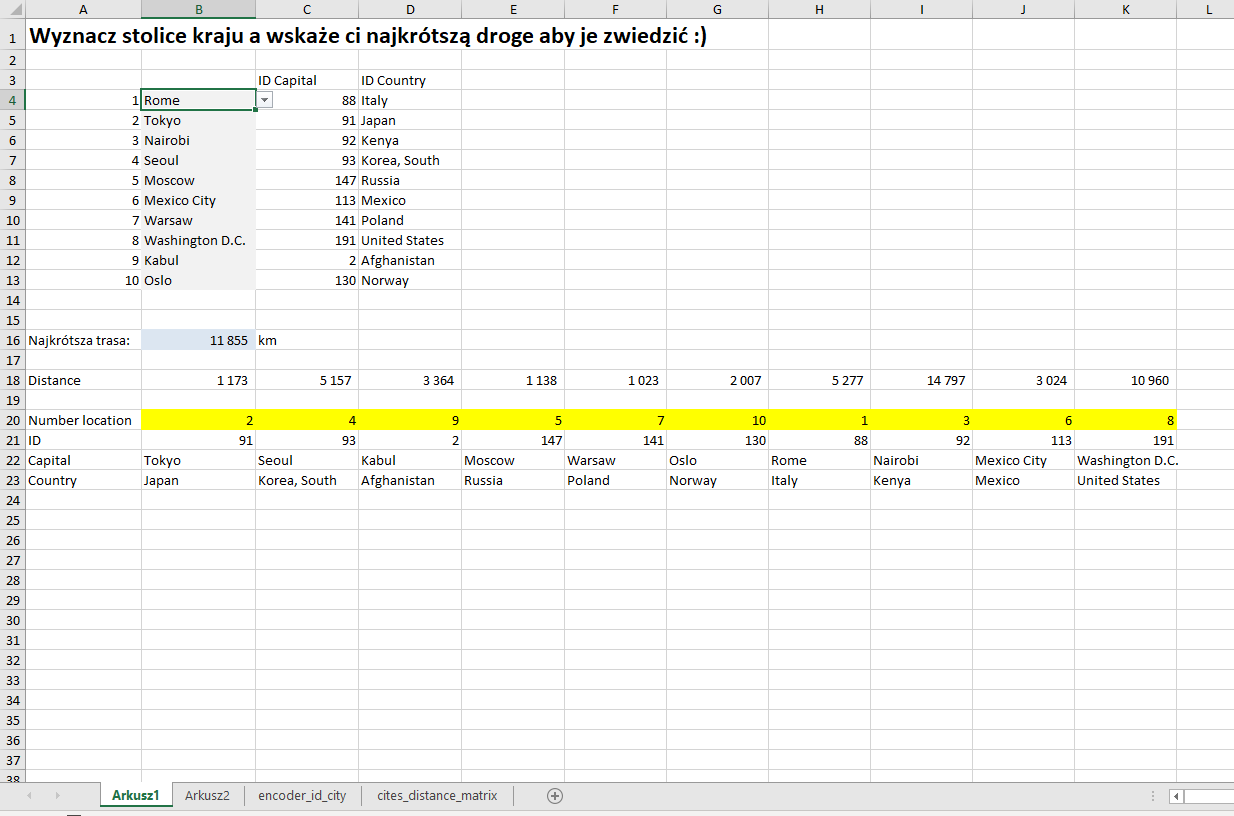

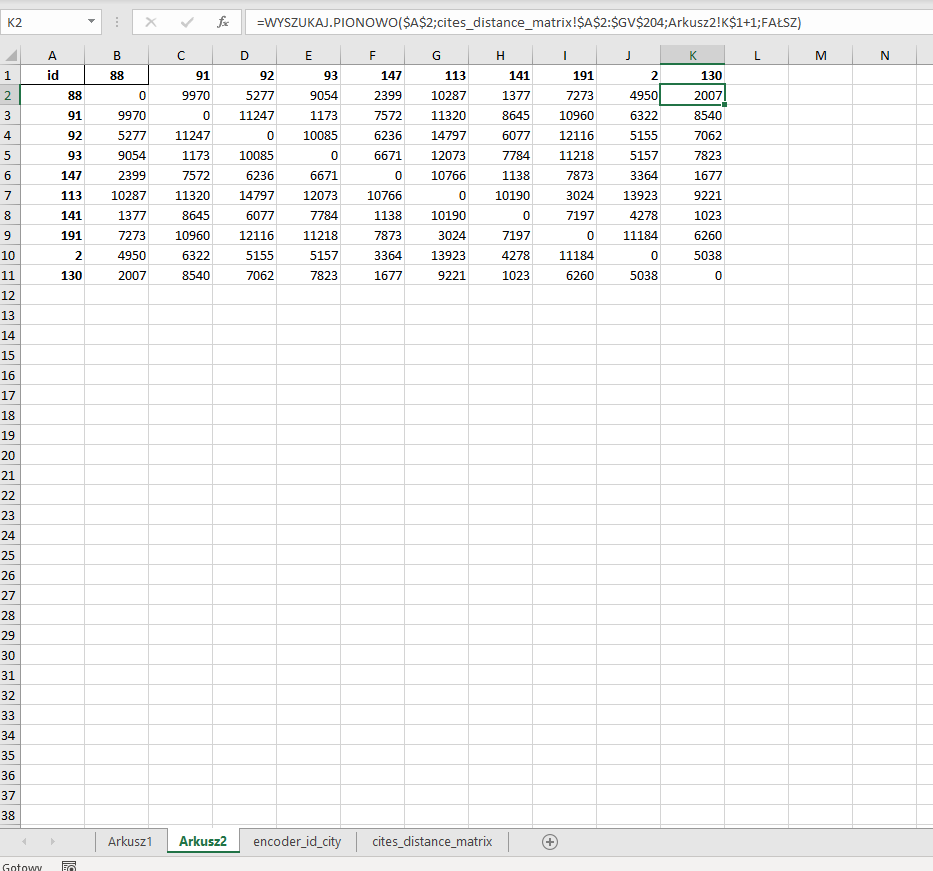

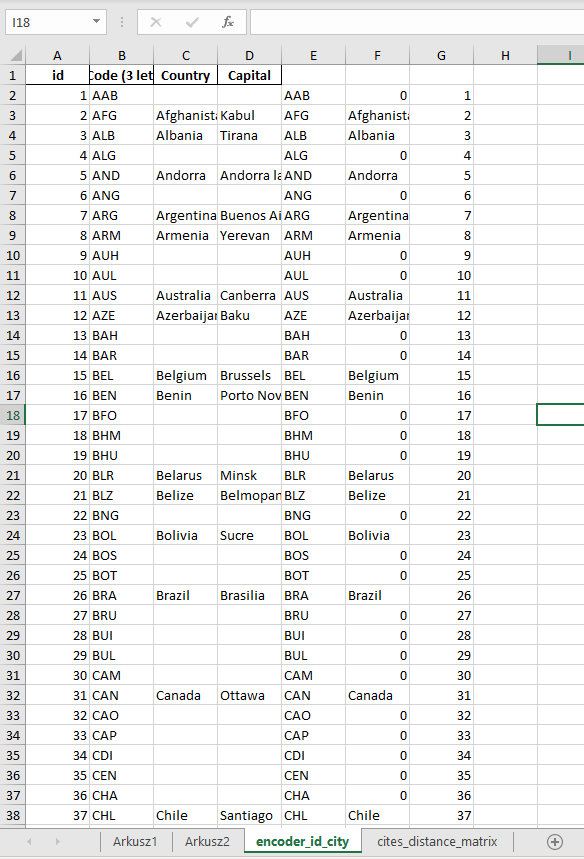

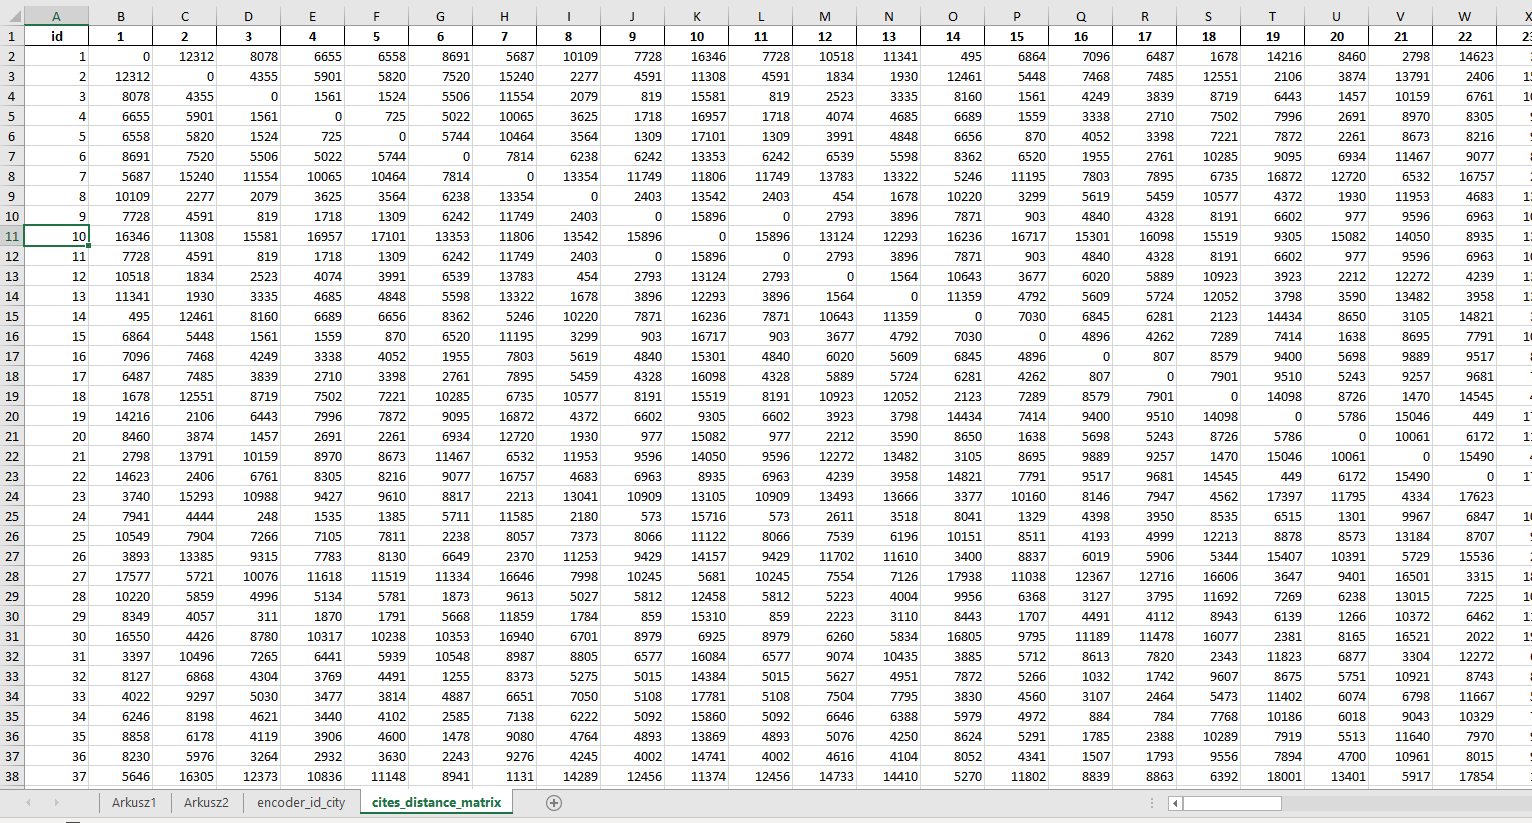

#do zrobienia


Optimization_Travelling_Salesman_Problem_-TSP-_distance/distance_beetween_city.ipynb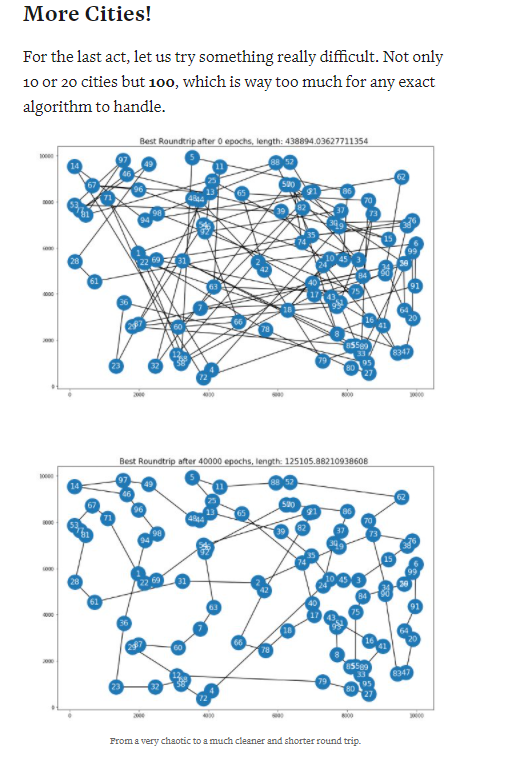

https://towardsdatascience.com/an-extensible-evolutionary-algorithm-example-in-python-7372c56a557b